In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('../input/heart.csv')

In [3]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
features = df.drop('target',axis=1)
labels = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2)

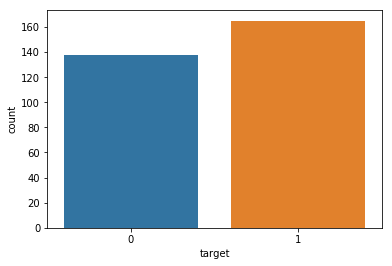

In [9]:
sns.countplot(df['target'])

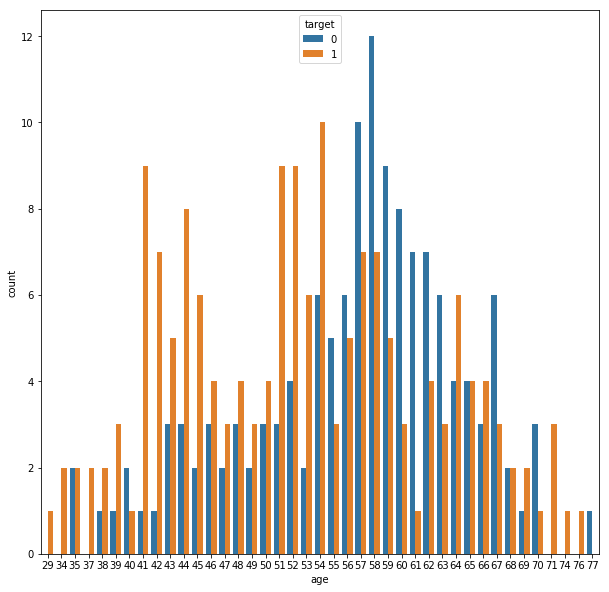

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(df['age'],hue=df['target'])

In [11]:
colsample_bytree = [0.6,0.8,1]
subsample = [0.6,0.8,1]
max_depth = [3,4,5,6,7]
min_child_weight = [1,5,10,20]
gamma = [0.5,1,1.5,2,5]

param_grid = {'colsample_bytree':colsample_bytree,
             'subsample':subsample,
             'max_depth':max_depth,
             'min_child_weight':min_child_weight,
             'gamma':gamma}

print("Xgboost parameters grid:", param_grid)

xgb = XGBClassifier()
random_xgb = RandomizedSearchCV(xgb, param_distributions=param_grid,
                                n_jobs=-1,random_state=42,cv=10)
random_xgb.fit(X_train, y_train)
print("Best parameters:", random_xgb.best_params_)
print("Best score", random_xgb.best_score_)
print("Accuracy on test set:", random_xgb.score(X_test,y_test))




Xgboost parameters grid: {'colsample_bytree': [0.6, 0.8, 1], 'subsample': [0.6, 0.8, 1], 'max_depth': [3, 4, 5, 6, 7], 'min_child_weight': [1, 5, 10, 20], 'gamma': [0.5, 1, 1.5, 2, 5]}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 7, 'gamma': 2, 'colsample_bytree': 0.6}
Best score 0.8347107438016529
Accuracy on test set: 0.7868852459016393


In [12]:
gamma = [0.001, 0.001, 0.1]
C = [1,10,100,1000]
kernel = ['rbf','linear']

param_grid = {'gamma':gamma,
             'C':C,
             'kernel':kernel}

print("SVC parameters :", param_grid)

svc = SVC()
random_svc = RandomizedSearchCV(svc, param_distributions=param_grid, 
                                n_jobs=-1,random_state=42,cv=10)
random_svc.fit(X_train, y_train)

print("Best parameters:", random_svc.best_params_)
print("Best score:", random_svc.best_score_)
print("Accuracy on test set:", random_svc.score(X_test, y_test))



SVC parameters : {'gamma': [0.001, 0.001, 0.1], 'C': [1, 10, 100, 1000], 'kernel': ['rbf', 'linear']}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 10}
Best score: 0.8264462809917356
Accuracy on test set: 0.7868852459016393


In [13]:
# Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features to consider when looking for the best split
max_features = ['auto', 'sqrt']

# Maximum depth of the tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

print('Random grid :', grid)

Random grid : {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
rf = RandomForestClassifier()
random_rf = RandomizedSearchCV(rf, param_distributions=grid, 
                               n_jobs=-1,cv=10,random_state=42)
random_rf.fit(X_train, y_train)

print("Best parameters:", random_rf.best_params_)
print("Best score:", random_rf.best_score_)
print("Score on test set:",random_rf.score(X_test, y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
Best score: 0.8305785123966942
Score on test set: 0.8032786885245902
